     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

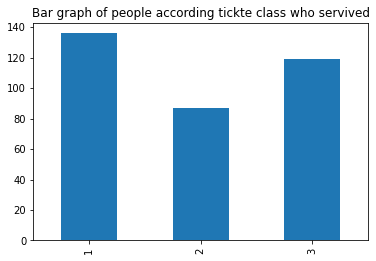

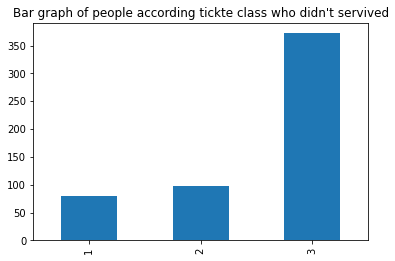

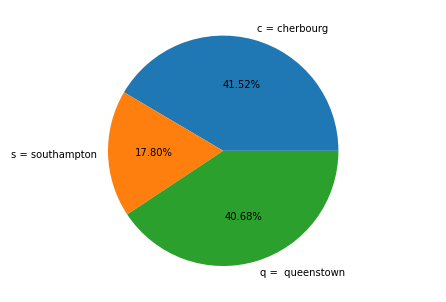

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings(action = "ignore")

# data reading .......

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train) 

train.head() 

train.shape
test.shape
train.isnull().sum()
test.isnull().sum()
train.describe()  

# ploting the data relations 

plt.figure(1)
train.loc[train['Survived'] == 1 ,"Pclass" ].value_counts().sort_index().plot.bar()
plt.title("Bar graph of people according tickte class who servived")

plt.figure(2) 
train.loc[train['Survived'] == 0 ,"Pclass"].value_counts().sort_index().plot.bar()  
plt.title("Bar graph of people according tickte class who didn't servived")




fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis("equal") 
l = ["c = cherbourg", "s = southampton" , "q =  queenstown" ]
s = [0.546464,0.23434 , 0.5354343]
ax.pie(s,labels = l,autopct = "%1.2f%%")

# understanding the hidden patterns of data 



train[ ["Pclass","Survived"]].groupby(["Pclass"] , as_index = False ).mean().sort_values(by="Survived", ascending = False)
train[ ["SibSp","Survived"]].groupby(["SibSp"] , as_index = False ).mean().sort_values(by="Survived", ascending = False)

#removing the unneccesary data 


train = train.drop(["Ticket"], axis = 1)
test = test.drop(["Ticket"], axis = 1 )
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1 )
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1 )



# selecting important features 

column_train = [ "Age" , "Pclass" ,"SibSp" ,"Parch" ,"Fare","Sex","Embarked"]


X = train[column_train]
Y = train["Survived"]

#DATA  preproccessing 

X["Age"] = X["Age"].fillna( X["Age"].median())

X["Age"].isnull().sum()

d = {"male" : 0 ,"female":1}

X['Sex'] = X["Sex"].apply( lambda x:d[x])

X.head()

X["Embarked"] = X["Embarked"].fillna( "C")


e = {"S" : 2,"Q":1,"C":0}

X["Embarked"] = X["Embarked"].apply(lambda x:e[x] )


# MODEl BUILDING And training  


from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y, test_size = 0.3,random_state = 7)



# Logistic regression  

from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score

lll = accuracy_score(Y_test,Y_pred) * 100 



# Stnadard vector machine 

from sklearn.svm import SVC 

model1 = SVC()
model1.fit(X_train,Y_train)
y_pred1 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
lll1 = accuracy_score(Y_test,y_pred1) * 100 


# Naive bayes algorithm

from sklearn.naive_bayes import GaussianNB 

model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
lll3 = accuracy_score(Y_test,y_pred3) * 100 


# decision Treee model 

from sklearn.tree import DecisionTreeClassifier 

model4 =DecisionTreeClassifier( criterion= "entropy" ,random_state = 7)

model4.fit(X_train,Y_train)
y_pred4 = model1.predict(X_test)
from sklearn.metrics import accuracy_score
lll4= accuracy_score(Y_test,y_pred4) * 100 











